O século 21 é o século das startups. Nas últimas 2 décadas, vimos um número recorde de startups de unicórnios responsáveis ​​pelas novas tecnologias, exploração do espaço, aprimoramento da educação e muito mais. Exemplos de tais startups de unicórnio são SpaceX, BYJUs, CRED, etc.
Neste artigo, vamos fazer a análise e visualização de dados da empresa Startup que surge como uma startup Unicorn após o ano de 2007


O conceito de empresa Startup ainda é bastante discutido. Uma startup é um modelo de negócio escalável e repetível que se desenvolve em condições de incerteza.

Ou seja, é necessário alcançar um número grande de clientes para gerar lucro sem ter custos elevados com o crescimento e a expansão.

Também é importante entregar aos clientes produtos iguais, e não personalizados um a um, de modo que todas as variáveis do produto estejam prontas para entrega repetida.

Startups de unicórnio



De acordo com o site [enotas](https://enotas.com.br/blog/startup-unicornio/) Startups unicórnio são as empresas de tecnologia privadas avaliadas em mais de um bilhão de dólares antes de abrir seu capital em bolsas de valores, ou seja, antes de realizar o IPO (Initial Public Offering).

A principal característica de uma startup unicórnio é a inovação no mercado em que pertence. A Uber, por exemplo, revolucionou o transporte, permitindo que os usuários solicitem um veículo com alguns cliques em qualquer lugar e a qualquer momento.



O termo startup unicórnio nasceu no ano 2013 quando o fundador da Cowboy Ventures o, Aillen Lee, o descreveu como empresas eram valorizadas em mais de 1 bilhão de dólares sem terem capital na bolsa de valores.

Essa descrição foi dada pela raridade dessas empresas e a dificuldade dessa valorização para negócios emergentes no mercado. Então, os unicórnios são as empresas que enfrentaram os desafios, sobreviveram aos obstáculos e alcançaram o tão sonhado décimo dígito.

O estudo será feito com Startups Mundiais e especificamente startups brasileiras.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats


#visualização 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/ESTUDO DE CASO/STARTUPS/Startups.csv')
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


Aqui temos o nome da empresa, sua avaliação atual, em qual data a empresa ingressou na startup Unicorn, País, De qual cidade, A empresa pertence a qual setor e os Investidores.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


TRATAMENTO DOS DADOS:

Renomeando as colunas

In [5]:
df = pd.DataFrame(df)
df.rename(columns = {'Date Joined' : 'Date'}, inplace = True)
df.rename(columns = {'Valuation ($B)' : 'Valuation'}, inplace = True)
df.rename(columns = {'Select Investors' : 'Investors'}, inplace = True)

Deletar a coluna  Unnamed:

In [20]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Passar para string

In [6]:
df['Investors'] = df['Investors'].to_string()

Tratando a data

In [7]:
date = df.Date.str.split('/', expand =True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]

In [8]:
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

In [9]:
#Tirando os caracteres
df['Valuation']=df['Valuation'].str.replace('$', '')

#Passando para númericos 
df.Valuation = pd.to_numeric(df.Valuation)
df.year = pd.to_numeric(df.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [21]:
df.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


A limpeza de dados é importante para obter um bom resultado. No primeiro segmento, renomeei alguns nomes de colunas. 


Como, dados unidos até a data, avaliação ($B) para avaliação e investidores selecionados para investidores.



Depois disso, dividimos a coluna de data em três colunas separadas, ano, mês e dia. Esses dados devem ser numéricos. 


Então, usando pandas, atribuímos o tipo de dados a numeric.


Agora na coluna de avaliação, sabemos que todos os valores estão em bilhões de dólares. 

É por isso que removemos o ($B) da coluna. E certifique-se de que o tipo de dados seja numérico.

In [11]:
df.head()

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  936 non-null    int64  
 1   Company     936 non-null    object 
 2   Valuation   936 non-null    float64
 3   Date        936 non-null    object 
 4   Country     936 non-null    object 
 5   City        921 non-null    object 
 6   Industry    936 non-null    object 
 7   Investors   936 non-null    object 
 8   year        936 non-null    int64  
 9   month       936 non-null    int64  
 10  day         936 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 80.6+ KB


In [13]:
df.shape

(936, 11)

Limpar os dados nulos:

In [14]:
df.isnull().sum()



Unnamed: 0     0
Company        0
Valuation      0
Date           0
Country        0
City          15
Industry       0
Investors      0
year           0
month          0
day            0
dtype: int64

In [22]:
#Excluindo os valores nulos 
df.dropna(inplace=True)

In [23]:
#Confirmar a limpeza dos valores nulos

df.isnull().sum()

Company      0
Valuation    0
Date         0
Country      0
City         0
Industry     0
Investors    0
year         0
month        0
day          0
dtype: int64

SALVAR O DATASET

In [24]:
df.to_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/ESTUDO DE CASO/STARTUPS/Startups_limpa.csv')

Startups de unicórnio em diferentes setores da indústria

In [ ]:
fig = px.pie(df, names='Industry')
fig.show()

20,03% das startups da Unicorn são Fintech. Tecnologia financeira é a tecnologia e inovação que visa competir com os métodos financeiros tradicionais na prestação de serviços financeiros. 


É uma indústria emergente que usa a tecnologia para melhorar as atividades em finanças.


As startups de unicórnio de inicialização baseadas em IA são 7,37%. A base de saúde é de 6,73%. Baseado em cibersegurança é de 4,38%. 


O gerenciamento e análise de dados é de 3,85%. Estou especificando apenas esses quatro unicórnios de startups porque esses setores são o futuro.

A empresa anual se juntou ao Unicorn Club

In [ ]:
fig3 = px.line(df, x='Company', y='year', title='Tempo de Empresa')
fig3.show()

Estas são algumas startups que se juntaram ao clube do unicórnio ano a ano. Você pode mover o cursor no gráfico e verá o ano em que se juntou ao clube do unicórnio.

Startup de unicórnio no país

In [ ]:
brasil = df[df['Country']== 'Brazil']
brasil

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
8,8,Nubank,30.00,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
111,111,QuintoAndar,5.10,9/9/2019,Brazil,Campinas,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2019,9,9
112,112,C6 Bank,5.05,12/2/2020,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2020,2,12
223,223,Nuvemshop,3.10,8/17/2021,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2021,17,8
233,233,Wildlife Studios,3.00,12/5/2019,Brazil,Sao Paulo,Other,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,12
264,264,Loft,2.90,1/3/2020,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2020,3,1
338,338,1,2.15,9/8/2021,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,8,9
385,385,Loggi,2.00,6/5/2019,Brazil,Sao Paulo,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2019,5,6
430,430,Creditas,1.75,12/18/2020,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2020,18,12
744,744,Movile,1.00,7/12/2018,Brazil,Sao Paulo,Mobile & telecommunications,"0 Sequoia Capital China, SIG Asia Investm...",2018,12,7


Organizando a empresa mais valiosa no mercado 

In [ ]:
avaliacao_da_empresa = df.sort_values(by="Valuation", ascending=False)
avaliacao_da_empresa.head(10)

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


No conjunto de dados que temos, a Bytedance da China é a startup mais valorizada, com uma avaliação total de US$ 140 bilhões. 


A SpaceX é a segunda startup mais valorizada com uma avaliação de US$ 100 bilhões. SpaceX se juntou ao clube do unicórnio em 2012.

Vou pesquisar uma empresa brasileira especifica no ramo de entregas.

In [ ]:
df[df['Company'] == 'iFood']

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
758,758,iFood,1.0,11/13/2018,Brazil,Osasco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2018,13,11


A cidade com mais valorização da startup

In [ ]:
x = df.groupby('City').sum().sort_values(by='Valuation', ascending=False).head(10)
x

,Unnamed: 0,Valuation,year,month,day
City,,,,,
San Francisco,55236,602.12,270653,2152,895
Beijing,30472,289.57,125103,993,412
New York,42021,175.44,163652,1350,559
London,12432,126.38,56551,445,214
Shanghai,23143,115.45,90847,640,287
Hawthorne,1,100.30,2012,1,12
Bengaluru,12109,80.43,50496,358,205
Shenzhen,7838,69.02,36318,280,95
Stockholm,972,58.08,8072,62,25


Criando um grafíco:

In [ ]:
x = x.reset_index()
px.bar(x='City', y = 'Valuation', data_frame=x)

San Francisco lidera o gráfico com uma avaliação total de US$ 602 bilhões. 

São Francisco produziu o maior número de startups de unicórnios com uma avaliação total de mais de US$ 600 bilhões. 

A cidade de Bengaluru está na 7ª posição na última, com uma avaliação total de US$ 80,43 bilhões.

São Paulo ficou na 10ª posição 52,95 Bilhões.

As 15 principais cidades com mais startups de unicórnio

In [ ]:
df.City.value_counts().head(15)

San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
Bengaluru         25
Shenzhen          18
Berlin            16
Paris             15
Chicago           14
Hangzhou          14
Boston            14
Tel Aviv          13
Mountain View     13
Palo Alto         11
Name: City, dtype: int64

Como esperado, a cidade de São Francisco tem o maior número de startups de unicórnio. A cidade de Bangalore tem 25. Nova York tem 81.

Nome da Empresa de uma cidade específica

In [ ]:
df[df.City=='Sao Paulo']['Company']

8                Nubank
112             C6 Bank
223           Nuvemshop
233    Wildlife Studios
264                Loft
338                   1
385               Loggi
430            Creditas
744              Movile
873               Unico
908              CargoX
Name: Company, dtype: object

Esta é a lista de empresas startups de unicórnios para a cidade de São Paulo.

Startups de unicórnio baseadas em países

In [ ]:
df[df.Country=='Brazil'][['Company','Valuation','Industry','year']]

,Company,Valuation,Industry,year
8,Nubank,30.00,Fintech,2018
111,QuintoAndar,5.10,E-commerce & direct-to-consumer,2019
112,C6 Bank,5.05,Fintech,2020
223,Nuvemshop,3.10,E-commerce & direct-to-consumer,2021
233,Wildlife Studios,3.00,Other,2019
264,Loft,2.90,E-commerce & direct-to-consumer,2020
338,1,2.15,Fintech,2021
385,Loggi,2.00,"Supply chain, logistics, & delivery",2019
430,Creditas,1.75,Fintech,2020
744,Movile,1.00,Mobile & telecommunications,2018


Esta é a lista de startups de unicórnio da brasileira. A Nubank lidera o gráfico com uma avaliação de US$ 30 bilhões. Pertence à indústria Fintech.  

Ele se junta à lista de unicórnios no ano de 2018. 

Startups de unicórnio baseadas no setor

Aqui estamos encontrando o unicórnio das startups brasileira que pertence à indústria de fintech. A saída é:

In [ ]:
df[df.Country=='Brazil'][df[df.Country =='Brazil'].Industry =='Fintech']['Company']

8        Nubank
112     C6 Bank
338           1
430    Creditas
776       EBANX
Name: Company, dtype: object

Os 20 países baseados em startups mais valorizados

In [ ]:
y = df.groupby('Country').sum().sort_values(by='Valuation', ascending= False).head(20)
y

,Unnamed: 0,Valuation,year,month,day
Country,,,,,
United States,214664,1604.03,963469,7598,3254
China,84372,569.48,341086,2663,1071
United Kingdom,16151,150.29,74719,605,281
India,22952,148.45,103018,800,387
Germany,10099,66.63,46462,360,138
Brazil,6961,61.05,30295,140,119
Sweden,972,58.08,8072,62,25
Australia,2901,50.60,12121,91,35
Israel,10105,43.82,42427,397,105


Grafico:

In [ ]:
y = y.reset_index()
px.bar(x='Country', y='Valuation', data_frame=y)

Os Estados Unidos têm uma avaliação total de mais de US$ 1.600 bilhões em startups de unicórnios. 

O Brasil está na 6ª posição com uma avaliação total de US$ 61.5 bilhões.

Gráfico de avaliação de empresas

In [ ]:
avaliacao = px.line(df, x='Company', y='Valuation')
avaliacao.show()

Gráfico de empresas de unicórnios iniciantes do Brasil:

In [ ]:
#brasil = df[df[['Country','Valuation']]== 'Brazil']


Palavra nuvem:



Usamos a nuvem de palavras para exibir os visuais dos dados de texto. Nuvens de palavras exibem as palavras mais proeminentes ou frequentes em um corpo de texto.

In [ ]:
from wordcloud import WordCloud

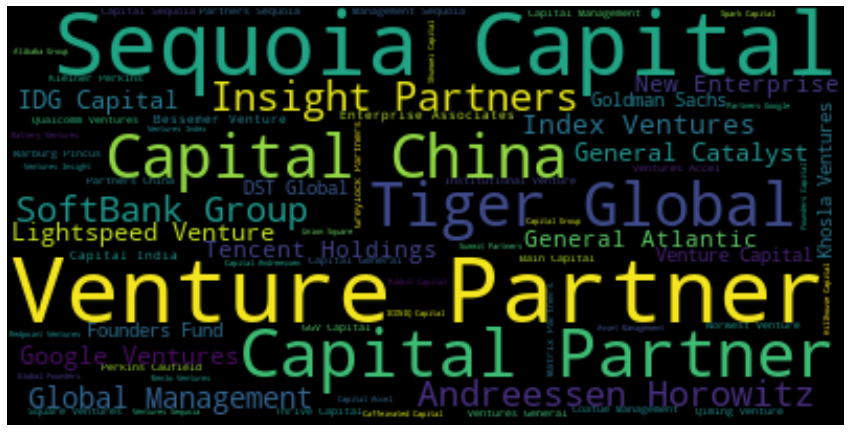

In [ ]:
wordCloud = WordCloud().generate(' '. join(df.Investors))

plt.figure(figsize=(15,17))
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear')
plt.show()

Gráfico da startups mais valorizados

In [ ]:
valorizados = df.groupby('Company').sum().sort_values('Valuation', ascending=False).head(20)

In [ ]:
valorizados = valorizados.reset_index()
px.bar(x='Company', y='Valuation', data_frame=valorizados)

Temos o Nubank empresa brasileira em 9º lugar das Startups mais valorizadas no mundo.

Mapa geográfico:

In [ ]:
codigo_pais = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['Country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in codigo_pais:
            code = codigo_pais[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Países com mais unicórnios", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

O mapa está mostrando a maior concentração de Startup pelo mundo. Os EUA lideram.

Clauder Noronha
